#탐색적 데이터 분석의 과정

데이터 둘러보기 -- 피처 엔지니어링(파생 피처 추가) -데이터시각화(분포도,막대그래프, 포인트 플롯, 산점도, 히트맵) - 분석 정리 및 모델링 전략

In [2]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 데이터 둘러보기

In [3]:
!unzip -qq "/content/gdrive/MyDrive/bike-sharing-demand.zip"

train = pd.read_csv('/content/train.csv')

In [4]:
test = pd.read_csv('/content/test.csv')

In [5]:
submission = pd.read_csv('/content/sampleSubmission.csv')

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


해당 칼럼의 뜻 살펴보기

datetime- 기록 일지

season 계절 

holiday 공휴일 여부 

weather 날씨

temp 실제 온도

atemp 체감온도

humidity 상대습도

windspeed 풍속

casual 등록되지 않은 사용자 수

registered 등록된 사용자수

count 자전거 대여수량

count -- target

In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train과 test를 비교해서 test에 없는 데이터를 train에서 빼야 한다.

casual 등록되지 않은 사용자 수

registered 등록된 사용자수

In [8]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


id값는 예측에 아무런 도움이 안되므로, 삭제한다.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


#피처 엔지니어링(파생 피처 추가) 

일부 데이터가 시각화 하기 어려운 상태일 수 있다. 적절하게 변환시켜보자. 예를 들면 여기서 datetime같은 변수다.

## datatime을 연도, 월, 일로 나누기

In [11]:
print(train['datetime'][100])

2011-01-05 09:00:00


In [12]:
print(train['datetime'][100].split())

['2011-01-05', '09:00:00']


In [13]:
print(train['datetime'][100].split()[0])

2011-01-05


In [14]:
print(train['datetime'][100].split()[1])

09:00:00


##datatime을 시 분 초로 나누기

In [15]:
print(train['datetime'][100].split()[1])

09:00:00


In [16]:
print(train['datetime'][100].split()[1].split(":"))

['09', '00', '00']


In [17]:
print(train['datetime'][100].split()[1].split(":")[0])

09


In [18]:
print(train['datetime'][100].split()[1].split(":")[1])

00


In [19]:
print(train['datetime'][100].split()[1].split(":")[2])

00


#datatime으로 파생변수 만들기

In [20]:
#날짜 피처
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

In [21]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19


In [22]:
#연도
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
#월
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
#일
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
#시간
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
#분
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
#초
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [23]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


##요일 피처

In [24]:
from datetime import datetime
import calendar

print(train['date'][100])
#datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))
#정수로 요일 변환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
#문자열로 요일 변환
print(calendar.day_name[datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


머신러닝은 숫자만 인식하므로, 숫자로 변환해야 한다.

In [25]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [26]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [27]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3 : 'Fall',
                                       4 : 'Winter'}) 

In [28]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [29]:
train['weather'] = train['weather'].map({1 : 'Clear',
                                         2 : 'Mist, Few clounds',
                                         3 : 'Light snow',
                                         4 : 'Heavy rain'})

In [30]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


#데이터 시각화

## 분포도

In [31]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

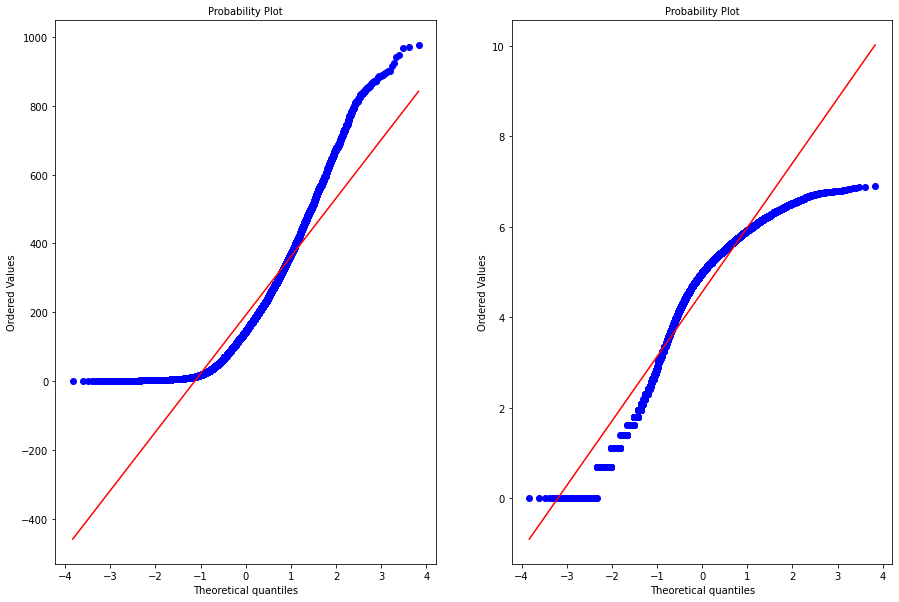

In [75]:
from scipy import stats

fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(train['count'], plot=plt)



fig.add_subplot(1,2,2)
res = stats.probplot(np.log(train['count']), plot=plt)


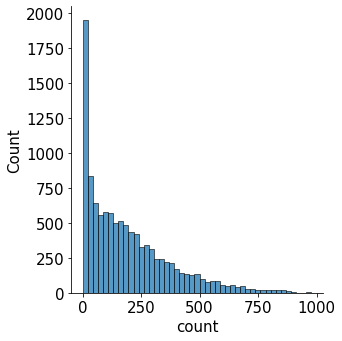

In [32]:
mpl.rc('font',size=15)
sns.displot(train['count']);

분포도가 0에 몰려있다. 즉 분포가 편향되어 있는데, 회귀분석모델은 좋은 성능을 내기 위해서 데이터를 정규분포처럼 만들어야 하기 때문에, 로그변환을 통해서 정규분포에 가깝게 만든다.

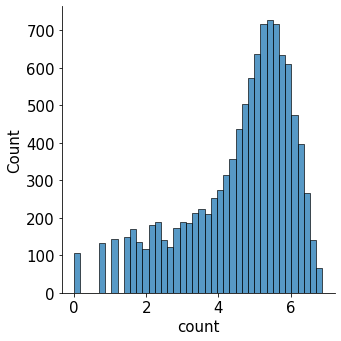

In [33]:
sns.displot(np.log(train['count']))

정규분포에 가까워 졌으므로, log변환을 취해야 한다.

하지만 마지막에 다시 지수변환을 해야 한다.

##막대그래프

seaborn의 barplot를 만든다.

연도,월, 일, 시, 분, 초별 평균 대여 수량 barplot  

과정

1. m행n열 figure 준비

2. subplot 할당

3. 세부 설정

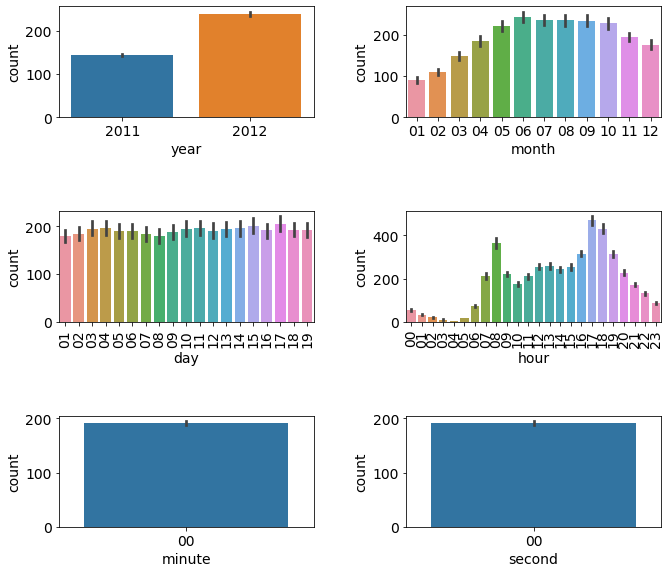

In [34]:
mpl.rc('font',size=14)
mpl.rc('axes',titlesize=15)
# 3행 2열 figure 만들기
figure, axes = plt.subplots(nrows=3,ncols=2)
#그래프 사이에 여백 확보
plt.tight_layout()
#전체 figure크기를 10x9인치로 설정
figure.set_size_inches(10,9)

sns.barplot(x='year',y = 'count',data=train, ax=axes[0,0])
sns.barplot(x='month', y = 'count', data = train, ax=axes[0,1])
sns.barplot(x='day', y = 'count', data = train, ax=axes[1,0])
sns.barplot(x='hour', y = 'count', data = train, ax=axes[1,1])
sns.barplot(x='minute', y = 'count', data = train, ax=axes[2,0])
sns.barplot(x='second', y = 'count', data = train, ax=axes[2,1])

axes[1,0].tick_params(axis='x',labelrotation=90)

axes[1,1].tick_params(axis='x',labelrotation=90)


1번의 연도별 평균 대여 수량그래프를 보면, 2011년보다 2012년이 더 많았다., 

2번그래프는 월별 평균 대여 그래프를 보면, 6월이 가장 많고, 1월에 가장 적다.

3번그래프는 일별 평균 대여 그래츠를 보면, 수량에 뚜렷한 차이가 없다. 따라서 day는 피처값으로 사용할 수 없다. 왜냐하면 day피처를 사용하기 위헤서는 훈련 데이터와 테스트 데이터에 공통된 값이 있어야 하는데, 훈련데이터의 day와 테스트 테이터의 day가 완전히 다르기 때문이다. 즉 신뢰구간이 짧다.따라서 삭제한다.

분별, 초별 그래프는 딱히 뭘 담고 있지가 않다. 따라서 삭제한다

## 박스플롯

범주형데이터에 따른 수치형 데이터 정보를 나타내는 그래프입니다. 계절, 날씨, 공휴일, 근무일, 별 대여수량을 그려보겠습니다.

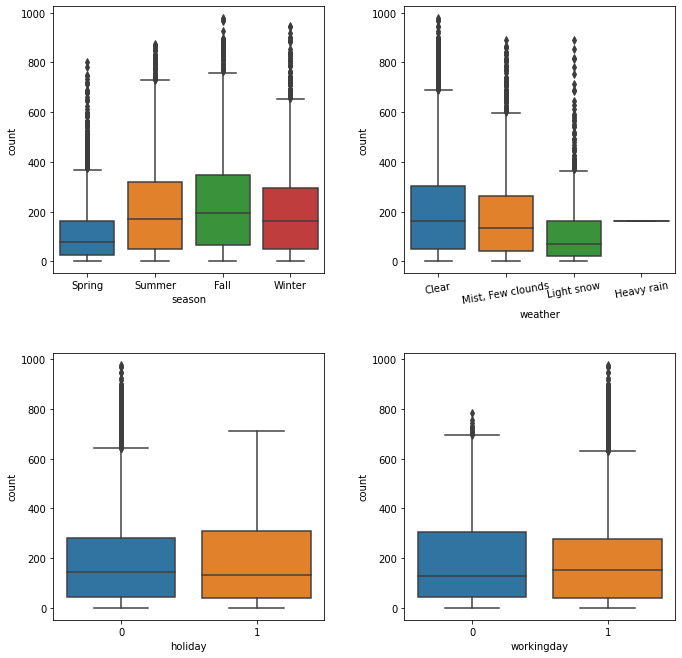

In [42]:
mpl.rc('font',size=10)
mpl.rc('axes',titlesize=10)
# 3행 2열 figure 만들기
figure, axes = plt.subplots(nrows=2,ncols=2)
#그래프 사이에 여백 확보
plt.tight_layout()
#전체 figure크기를 10x9인치로 설정
figure.set_size_inches(10,10)

sns.boxplot(x='season', y = 'count', data=train, ax=axes[0,0])
sns.boxplot(x = 'weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y = 'count', data=train, ax=axes[1,0])
sns.boxplot(x = 'workingday', y='count', data=train, ax=axes[1,1])

axes[0,1].tick_params(axis='x', labelrotation = 10)

1번 박스플롯을 보면 가을에 가장 많고, 봄에 가장 적게 빌린다.

2번 박스플롯을 보면 맑을때 가장 많이 빌리고, 비가 많이 오면 안빌린다.

3번 박스플롯을 보면, 공휴일과 공휴일이 아닐때의 중앙값은 거의 비슷하지만, 공휴일이 아닐때 이상치가 매우 많다.

4번 박스플롯을 보면, 마찬가지로, 근무일일때 이상치가 많다.

## 포인트 플롯

약간 시간값이 포함된 경우에 쓰면 좋을듯.

In [45]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


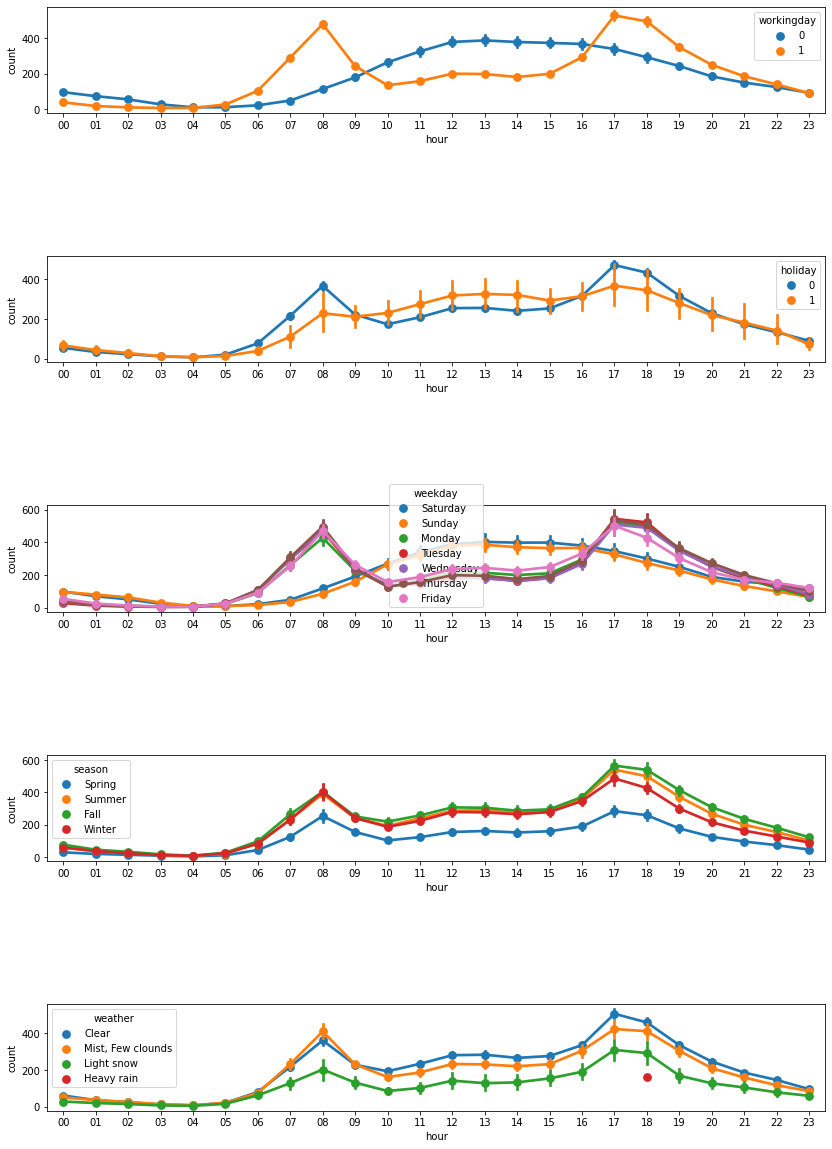

In [51]:
mpl.rc('font',size=10)
mpl.rc('axes',titlesize=10)
# 3행 2열 figure 만들기
figure, axes = plt.subplots(nrows=5)
#그래프 사이에 여백 확보
plt.tight_layout()
#전체 figure크기를 10x9인치로 설정
figure.set_size_inches(12,18)


sns.pointplot(x='hour', y = 'count', data=train,hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y = 'count', data=train,hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y = 'count', data=train,hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y = 'count', data=train,hue='season', ax=axes[3])
sns.pointplot(x='hour', y = 'count', data=train,hue='weather', ax=axes[4])

1번그래프는 근무일에 출,퇴근 시간에 몰리고, 근무시간이 아닐때는 오후시간때에 몰린다.

2번그래프는 공휴일 여부

3번은 요일별

4번은 계절별

5번은 날씨별을 의미하는데 자세히보면 heavy rain이라는 이상치가 존재한다. 삭제하자.

## 회귀선을 포함한 산점도 그래프

산점도 그래프는 수치형 데이터 간 상관관계를 파악하는데 사용한다.

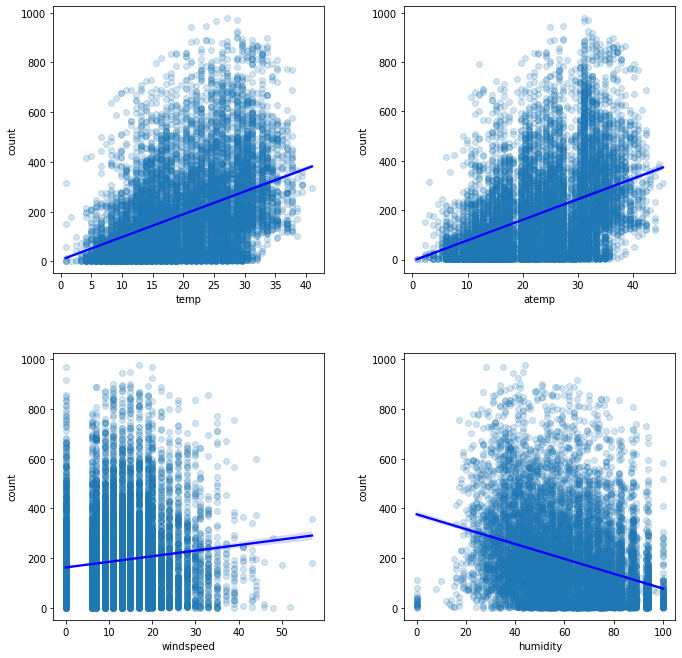

In [54]:
mpl.rc('font',size=10)
mpl.rc('axes',titlesize=10)
# 3행 2열 figure 만들기
figure, axes = plt.subplots(nrows=2,ncols=2)
#그래프 사이에 여백 확보
plt.tight_layout()
#전체 figure크기를 10x9인치로 설정
figure.set_size_inches(10,10)

sns.regplot(x='temp',y='count', data=train, ax=axes[0,0], scatter_kws={'alpha' : 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp',y='count', data=train, ax=axes[0,1], scatter_kws={'alpha' : 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count', data=train, ax=axes[1,0], scatter_kws={'alpha' : 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count', data=train, ax=axes[1,1], scatter_kws={'alpha' : 0.2}, line_kws={'color':'blue'})

1번, 2번그래프로, 온도와 체감 온도기 높을수록 대여수량이 많다.

3번 windspeed의 결측치가 많아서 0으로 많이 잡힌다. 피처를 삭제하자.

4번을 보면 슴도가 낮을수록 대여수가 높다는 것을 의미한다.

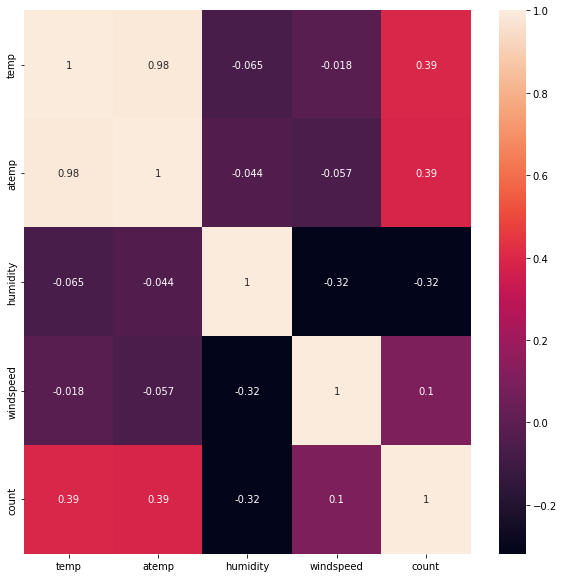

In [57]:
fig,ax = plt.subplots()

fig.set_size_inches(10,10)

corrmat = train[['temp','atemp','humidity','windspeed','count']].corr()

sns.heatmap(corrmat,annot=True)

다수의 결측치가 있고, 상관관계도 낮은 windspeed를 삭제하자.

#베이스라인 모델

##피처 엔지니어링

### 이상치 제거

In [58]:
train = train[train['weather'] != 4]

### 데이터 합치기

In [63]:
all_data = pd.concat([train,test],ignore_index=True)

In [64]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


casual, register, count가 없으므로 nan으로 표시된 것읗 알 수 있다.

###v파생 피처 추가

In [65]:
#날짜
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
#연도
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
#월
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
#시간
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
#요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

###필요 없는 피처 제거

In [66]:
drop_feature = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_feature,axis=1)

무조건 피처가 많다고 좋은 것은 아니다. 타겟값과 관련이 없는 피처가 많다면, 오히려 예측이 떨어진다.

In [67]:
X_train = all_data[~pd.isnull(all_data['count'])]

In [68]:
X_test = all_data[pd.isnull(all_data['count'])]

In [69]:
X_train = X_train.drop(['count'],axis=1)
X_test = X_test.drop(['count'],axis=1)

y = train['count']

In [76]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour,minute,second,weekday
0,Spring,0,0,Clear,9.84,14.395,81,2011,01,00,00,00,Saturday
1,Spring,0,0,Clear,9.02,13.635,80,2011,01,01,00,00,Saturday
2,Spring,0,0,Clear,9.02,13.635,80,2011,01,02,00,00,Saturday
3,Spring,0,0,Clear,9.84,14.395,75,2011,01,03,00,00,Saturday
4,Spring,0,0,Clear,9.84,14.395,75,2011,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0,1,Clear,15.58,19.695,50,2012,19,19,00,00,Wednesday
10882,Winter,0,1,Clear,14.76,17.425,57,2012,19,20,00,00,Wednesday
10883,Winter,0,1,Clear,13.94,15.910,61,2012,19,21,00,00,Wednesday
10884,Winter,0,1,Clear,13.94,17.425,61,2012,19,22,00,00,Wednesday


### 모델 훈련

In [71]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [73]:
#로그변환환
log_y = np.log(y)
linear_reg_model.fit(X_train,log_y)

ValueError: ignored